<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_OneQ9_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합니다.

In [45]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [46]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis =0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis = 0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

In [47]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [48]:
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=8,
                    validation_data=(test_data, test_labels))

Epoch 1/100
51/51 [==============================] - 0s 4ms/step - loss: 0.7827 - mae: 0.6309 - val_loss: 16.4503 - val_mae: 2.6388
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 0.7926 - mae: 0.5970 - val_loss: 15.9799 - val_mae: 2.5762
Epoch 3/100
51/51 [==============================] - 0s 6ms/step - loss: 0.7428 - mae: 0.6294 - val_loss: 16.0417 - val_mae: 2.6431
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 0.7241 - mae: 0.5988 - val_loss: 15.1029 - val_mae: 2.5199
Epoch 5/100
51/51 [==============================] - 0s 6ms/step - loss: 0.7699 - mae: 0.6440 - val_loss: 16.2351 - val_mae: 2.6050
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 0.8148 - mae: 0.6308 - val_loss: 14.9067 - val_mae: 2.4910
Epoch 7/100
51/51 [==============================] - 0s 6ms/step - loss: 0.8378 - mae: 0.6422 - val_loss: 16.2049 - val_mae: 2.5926
Epoch 8/100
51/51 [==============================] - 0s 5ms/step - loss: 0.7

<ipython-input-49-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


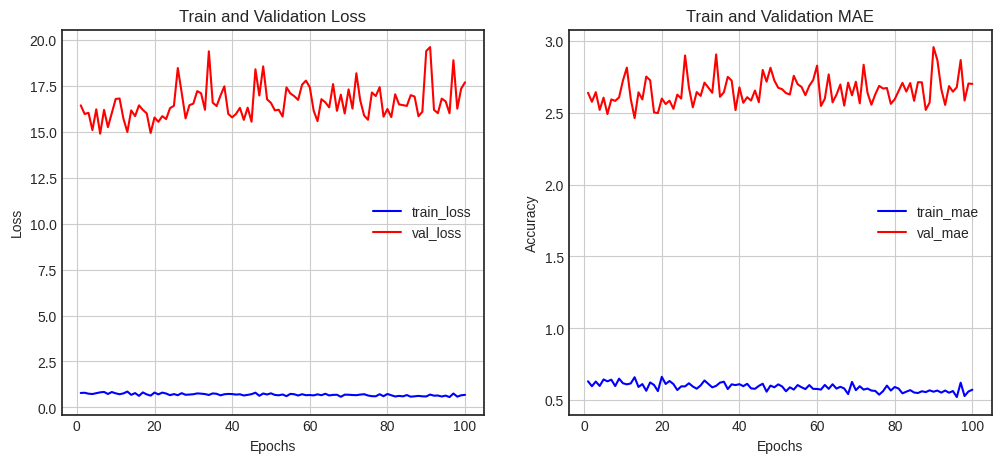

In [49]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [50]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 17.7068 - mae: 2.7009


[17.706762313842773, 2.700878143310547]